## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906


0:	learn: 0.9668810	total: 106ms	remaining: 1m 45s
1:	learn: 0.9346583	total: 106ms	remaining: 53s
2:	learn: 0.9075868	total: 107ms	remaining: 35.5s
3:	learn: 0.8768525	total: 109ms	remaining: 27.1s
4:	learn: 0.8521174	total: 110ms	remaining: 21.8s
5:	learn: 0.8244215	total: 111ms	remaining: 18.3s
6:	learn: 0.8020034	total: 131ms	remaining: 18.5s
7:	learn: 0.7788055	total: 134ms	remaining: 16.7s
8:	learn: 0.7528720	total: 135ms	remaining: 14.9s
9:	learn: 0.7306290	total: 136ms	remaining: 13.4s
10:	learn: 0.7078508	total: 136ms	remaining: 12.3s


11:	learn: 0.6849833	total: 139ms	remaining: 11.5s
12:	learn: 0.6635188	total: 140ms	remaining: 10.6s
13:	learn: 0.6447650	total: 140ms	remaining: 9.89s
14:	learn: 0.6246157	total: 141ms	remaining: 9.26s
15:	learn: 0.6063735	total: 142ms	remaining: 8.72s
16:	learn: 0.5871660	total: 142ms	remaining: 8.23s
17:	learn: 0.5703811	total: 143ms	remaining: 7.78s
18:	learn: 0.5538665	total: 143ms	remaining: 7.38s
19:	learn: 0.5383897	total: 143ms	remaining: 7.03s
20:	learn: 0.5231792	total: 144ms	remaining: 6.72s
21:	learn: 0.5083671	total: 145ms	remaining: 6.46s
22:	learn: 0.4930069	total: 146ms	remaining: 6.21s
23:	learn: 0.4774741	total: 147ms	remaining: 5.98s
24:	learn: 0.4638835	total: 147ms	remaining: 5.75s
25:	learn: 0.4492279	total: 148ms	remaining: 5.54s
26:	learn: 0.4361126	total: 148ms	remaining: 5.34s
27:	learn: 0.4233140	total: 149ms	remaining: 5.16s
28:	learn: 0.4102266	total: 150ms	remaining: 5.02s
29:	learn: 0.3993670	total: 163ms	remaining: 5.26s
30:	learn: 0.3882571	total: 163

96:	learn: 0.0887996	total: 241ms	remaining: 2.24s
97:	learn: 0.0874445	total: 243ms	remaining: 2.24s
98:	learn: 0.0858856	total: 244ms	remaining: 2.22s
99:	learn: 0.0848144	total: 244ms	remaining: 2.2s
100:	learn: 0.0833692	total: 245ms	remaining: 2.18s
101:	learn: 0.0818059	total: 245ms	remaining: 2.16s
102:	learn: 0.0810597	total: 246ms	remaining: 2.15s
103:	learn: 0.0799099	total: 247ms	remaining: 2.13s
104:	learn: 0.0785270	total: 247ms	remaining: 2.11s
105:	learn: 0.0774557	total: 248ms	remaining: 2.09s
106:	learn: 0.0768174	total: 248ms	remaining: 2.07s
107:	learn: 0.0757111	total: 249ms	remaining: 2.05s
108:	learn: 0.0746768	total: 250ms	remaining: 2.04s
109:	learn: 0.0735694	total: 251ms	remaining: 2.03s
110:	learn: 0.0729465	total: 251ms	remaining: 2.01s
111:	learn: 0.0724158	total: 252ms	remaining: 2s
112:	learn: 0.0713149	total: 252ms	remaining: 1.98s
113:	learn: 0.0707970	total: 253ms	remaining: 1.96s
114:	learn: 0.0697966	total: 253ms	remaining: 1.95s
115:	learn: 0.069022

133:	learn: 0.0583270	total: 269ms	remaining: 1.74s
134:	learn: 0.0577988	total: 270ms	remaining: 1.73s
135:	learn: 0.0573720	total: 271ms	remaining: 1.72s
136:	learn: 0.0571791	total: 271ms	remaining: 1.71s
137:	learn: 0.0568581	total: 280ms	remaining: 1.75s
138:	learn: 0.0564611	total: 280ms	remaining: 1.74s
139:	learn: 0.0563296	total: 280ms	remaining: 1.72s
140:	learn: 0.0558628	total: 283ms	remaining: 1.72s
141:	learn: 0.0554247	total: 287ms	remaining: 1.73s
142:	learn: 0.0552197	total: 287ms	remaining: 1.72s
143:	learn: 0.0549315	total: 288ms	remaining: 1.71s
144:	learn: 0.0544911	total: 288ms	remaining: 1.7s
145:	learn: 0.0541098	total: 289ms	remaining: 1.69s
146:	learn: 0.0537105	total: 289ms	remaining: 1.68s
147:	learn: 0.0534380	total: 290ms	remaining: 1.67s
148:	learn: 0.0532337	total: 291ms	remaining: 1.66s
149:	learn: 0.0529329	total: 301ms	remaining: 1.7s
150:	learn: 0.0525939	total: 301ms	remaining: 1.69s
151:	learn: 0.0522516	total: 302ms	remaining: 1.68s
152:	learn: 0.

196:	learn: 0.0435977	total: 361ms	remaining: 1.47s
197:	learn: 0.0434207	total: 361ms	remaining: 1.46s
198:	learn: 0.0433147	total: 361ms	remaining: 1.45s
199:	learn: 0.0431892	total: 361ms	remaining: 1.45s
200:	learn: 0.0430331	total: 362ms	remaining: 1.44s
201:	learn: 0.0427740	total: 362ms	remaining: 1.43s
202:	learn: 0.0426764	total: 362ms	remaining: 1.42s
203:	learn: 0.0424146	total: 363ms	remaining: 1.42s
204:	learn: 0.0421678	total: 364ms	remaining: 1.41s
205:	learn: 0.0420615	total: 364ms	remaining: 1.4s
206:	learn: 0.0419586	total: 365ms	remaining: 1.4s
207:	learn: 0.0418071	total: 365ms	remaining: 1.39s
208:	learn: 0.0417357	total: 366ms	remaining: 1.39s
209:	learn: 0.0415918	total: 367ms	remaining: 1.38s
210:	learn: 0.0414578	total: 367ms	remaining: 1.37s
211:	learn: 0.0413144	total: 368ms	remaining: 1.37s
212:	learn: 0.0412140	total: 368ms	remaining: 1.36s
213:	learn: 0.0411179	total: 369ms	remaining: 1.35s
214:	learn: 0.0410493	total: 369ms	remaining: 1.35s
215:	learn: 0.

249:	learn: 0.0369034	total: 404ms	remaining: 1.21s
250:	learn: 0.0367818	total: 404ms	remaining: 1.21s
251:	learn: 0.0366996	total: 406ms	remaining: 1.2s
252:	learn: 0.0365487	total: 407ms	remaining: 1.2s
253:	learn: 0.0364592	total: 409ms	remaining: 1.2s
254:	learn: 0.0363460	total: 409ms	remaining: 1.19s
255:	learn: 0.0362095	total: 414ms	remaining: 1.2s
256:	learn: 0.0361106	total: 415ms	remaining: 1.2s
257:	learn: 0.0359897	total: 415ms	remaining: 1.19s
258:	learn: 0.0359170	total: 417ms	remaining: 1.19s
259:	learn: 0.0358162	total: 418ms	remaining: 1.19s
260:	learn: 0.0356858	total: 419ms	remaining: 1.19s
261:	learn: 0.0355346	total: 419ms	remaining: 1.18s
262:	learn: 0.0354127	total: 420ms	remaining: 1.18s
263:	learn: 0.0353006	total: 421ms	remaining: 1.17s
264:	learn: 0.0352297	total: 423ms	remaining: 1.17s
265:	learn: 0.0350718	total: 424ms	remaining: 1.17s
266:	learn: 0.0349465	total: 425ms	remaining: 1.17s
267:	learn: 0.0348472	total: 425ms	remaining: 1.16s
268:	learn: 0.034

339:	learn: 0.0295610	total: 491ms	remaining: 953ms
340:	learn: 0.0295185	total: 491ms	remaining: 950ms
341:	learn: 0.0294621	total: 492ms	remaining: 946ms
342:	learn: 0.0293990	total: 492ms	remaining: 942ms
343:	learn: 0.0293210	total: 492ms	remaining: 939ms
344:	learn: 0.0292287	total: 493ms	remaining: 937ms
345:	learn: 0.0291924	total: 494ms	remaining: 933ms
346:	learn: 0.0291579	total: 494ms	remaining: 930ms
347:	learn: 0.0290782	total: 495ms	remaining: 927ms
348:	learn: 0.0289977	total: 495ms	remaining: 923ms
349:	learn: 0.0289375	total: 495ms	remaining: 920ms
350:	learn: 0.0288865	total: 495ms	remaining: 916ms
351:	learn: 0.0288368	total: 496ms	remaining: 913ms
352:	learn: 0.0287632	total: 496ms	remaining: 909ms
353:	learn: 0.0286763	total: 496ms	remaining: 906ms
354:	learn: 0.0286011	total: 497ms	remaining: 902ms
355:	learn: 0.0285383	total: 497ms	remaining: 899ms
356:	learn: 0.0284768	total: 497ms	remaining: 896ms
357:	learn: 0.0284416	total: 498ms	remaining: 892ms
358:	learn: 

398:	learn: 0.0262601	total: 531ms	remaining: 800ms
399:	learn: 0.0262264	total: 531ms	remaining: 797ms
400:	learn: 0.0261750	total: 533ms	remaining: 796ms
401:	learn: 0.0261446	total: 534ms	remaining: 794ms
402:	learn: 0.0261003	total: 534ms	remaining: 791ms
403:	learn: 0.0260739	total: 535ms	remaining: 789ms
404:	learn: 0.0260521	total: 537ms	remaining: 789ms
405:	learn: 0.0260084	total: 537ms	remaining: 786ms
406:	learn: 0.0259909	total: 539ms	remaining: 785ms
407:	learn: 0.0259298	total: 539ms	remaining: 782ms
408:	learn: 0.0258986	total: 540ms	remaining: 780ms
409:	learn: 0.0258685	total: 540ms	remaining: 777ms
410:	learn: 0.0258077	total: 540ms	remaining: 774ms
411:	learn: 0.0257902	total: 540ms	remaining: 771ms
412:	learn: 0.0257557	total: 541ms	remaining: 769ms
413:	learn: 0.0257139	total: 541ms	remaining: 766ms
414:	learn: 0.0256745	total: 541ms	remaining: 763ms
415:	learn: 0.0256161	total: 542ms	remaining: 760ms
416:	learn: 0.0255790	total: 542ms	remaining: 758ms
417:	learn: 

517:	learn: 0.0220849	total: 608ms	remaining: 566ms
518:	learn: 0.0220380	total: 609ms	remaining: 564ms
519:	learn: 0.0219967	total: 609ms	remaining: 562ms
520:	learn: 0.0219746	total: 610ms	remaining: 561ms
521:	learn: 0.0219510	total: 610ms	remaining: 559ms
522:	learn: 0.0219117	total: 611ms	remaining: 557ms
523:	learn: 0.0218956	total: 611ms	remaining: 555ms
524:	learn: 0.0218831	total: 612ms	remaining: 554ms
525:	learn: 0.0218391	total: 612ms	remaining: 552ms
526:	learn: 0.0218256	total: 613ms	remaining: 550ms
527:	learn: 0.0217823	total: 613ms	remaining: 548ms
528:	learn: 0.0217690	total: 614ms	remaining: 547ms
529:	learn: 0.0217368	total: 615ms	remaining: 545ms
530:	learn: 0.0217000	total: 615ms	remaining: 543ms
531:	learn: 0.0216622	total: 616ms	remaining: 542ms
532:	learn: 0.0216275	total: 616ms	remaining: 540ms
533:	learn: 0.0216003	total: 617ms	remaining: 538ms
534:	learn: 0.0215833	total: 617ms	remaining: 536ms
535:	learn: 0.0215665	total: 618ms	remaining: 535ms
536:	learn: 

596:	learn: 0.0199832	total: 656ms	remaining: 443ms
597:	learn: 0.0199706	total: 657ms	remaining: 441ms
598:	learn: 0.0199406	total: 657ms	remaining: 440ms
599:	learn: 0.0199262	total: 658ms	remaining: 438ms
600:	learn: 0.0198936	total: 658ms	remaining: 437ms
601:	learn: 0.0198676	total: 658ms	remaining: 435ms
602:	learn: 0.0198538	total: 659ms	remaining: 434ms
603:	learn: 0.0198252	total: 659ms	remaining: 432ms
604:	learn: 0.0198041	total: 660ms	remaining: 431ms
605:	learn: 0.0197880	total: 660ms	remaining: 429ms
606:	learn: 0.0197738	total: 667ms	remaining: 432ms
607:	learn: 0.0197359	total: 672ms	remaining: 433ms
608:	learn: 0.0197200	total: 673ms	remaining: 432ms
609:	learn: 0.0196937	total: 674ms	remaining: 431ms
610:	learn: 0.0196820	total: 674ms	remaining: 429ms
611:	learn: 0.0196543	total: 674ms	remaining: 428ms
612:	learn: 0.0196278	total: 675ms	remaining: 426ms
613:	learn: 0.0196009	total: 675ms	remaining: 425ms
614:	learn: 0.0195861	total: 676ms	remaining: 423ms
615:	learn: 

680:	learn: 0.0180682	total: 723ms	remaining: 339ms
681:	learn: 0.0180407	total: 723ms	remaining: 337ms
682:	learn: 0.0180265	total: 724ms	remaining: 336ms
683:	learn: 0.0180007	total: 724ms	remaining: 335ms
684:	learn: 0.0179759	total: 725ms	remaining: 333ms
685:	learn: 0.0179487	total: 725ms	remaining: 332ms
686:	learn: 0.0179261	total: 725ms	remaining: 331ms
687:	learn: 0.0178995	total: 726ms	remaining: 329ms
688:	learn: 0.0178787	total: 726ms	remaining: 328ms
689:	learn: 0.0178578	total: 727ms	remaining: 327ms
690:	learn: 0.0178331	total: 727ms	remaining: 325ms
691:	learn: 0.0178133	total: 728ms	remaining: 324ms
692:	learn: 0.0177873	total: 730ms	remaining: 323ms
693:	learn: 0.0177755	total: 733ms	remaining: 323ms
694:	learn: 0.0177549	total: 734ms	remaining: 322ms
695:	learn: 0.0177439	total: 735ms	remaining: 321ms
696:	learn: 0.0177188	total: 735ms	remaining: 319ms
697:	learn: 0.0176874	total: 735ms	remaining: 318ms
698:	learn: 0.0176792	total: 736ms	remaining: 317ms
699:	learn: 

722:	learn: 0.0172701	total: 762ms	remaining: 292ms
723:	learn: 0.0172584	total: 762ms	remaining: 291ms
724:	learn: 0.0172286	total: 763ms	remaining: 289ms
725:	learn: 0.0172005	total: 763ms	remaining: 288ms
726:	learn: 0.0171701	total: 764ms	remaining: 287ms
727:	learn: 0.0171492	total: 765ms	remaining: 286ms
728:	learn: 0.0171382	total: 765ms	remaining: 285ms
729:	learn: 0.0171235	total: 766ms	remaining: 283ms
730:	learn: 0.0170973	total: 766ms	remaining: 282ms
731:	learn: 0.0170730	total: 767ms	remaining: 281ms
732:	learn: 0.0170537	total: 767ms	remaining: 280ms
733:	learn: 0.0170501	total: 768ms	remaining: 278ms
734:	learn: 0.0170396	total: 768ms	remaining: 277ms
735:	learn: 0.0170162	total: 769ms	remaining: 276ms
736:	learn: 0.0170058	total: 770ms	remaining: 275ms
737:	learn: 0.0169920	total: 770ms	remaining: 273ms
738:	learn: 0.0169876	total: 771ms	remaining: 272ms
739:	learn: 0.0169742	total: 771ms	remaining: 271ms
740:	learn: 0.0169605	total: 772ms	remaining: 270ms
741:	learn: 

874:	learn: 0.0150296	total: 848ms	remaining: 121ms
875:	learn: 0.0150042	total: 860ms	remaining: 122ms
876:	learn: 0.0149955	total: 863ms	remaining: 121ms
877:	learn: 0.0149894	total: 864ms	remaining: 120ms
878:	learn: 0.0149824	total: 864ms	remaining: 119ms
879:	learn: 0.0149638	total: 865ms	remaining: 118ms
880:	learn: 0.0149579	total: 868ms	remaining: 117ms
881:	learn: 0.0149487	total: 869ms	remaining: 116ms
882:	learn: 0.0149372	total: 870ms	remaining: 115ms
883:	learn: 0.0149295	total: 870ms	remaining: 114ms
884:	learn: 0.0149232	total: 871ms	remaining: 113ms
885:	learn: 0.0149122	total: 871ms	remaining: 112ms
886:	learn: 0.0148896	total: 871ms	remaining: 111ms
887:	learn: 0.0148748	total: 871ms	remaining: 110ms
888:	learn: 0.0148605	total: 873ms	remaining: 109ms
889:	learn: 0.0148519	total: 874ms	remaining: 108ms
890:	learn: 0.0148427	total: 874ms	remaining: 107ms
891:	learn: 0.0148214	total: 875ms	remaining: 106ms
892:	learn: 0.0148085	total: 875ms	remaining: 105ms
893:	learn: 

931:	learn: 0.0143753	total: 908ms	remaining: 66.2ms
932:	learn: 0.0143565	total: 908ms	remaining: 65.2ms
933:	learn: 0.0143416	total: 908ms	remaining: 64.2ms
934:	learn: 0.0143293	total: 909ms	remaining: 63.2ms
935:	learn: 0.0143239	total: 909ms	remaining: 62.1ms
936:	learn: 0.0143054	total: 909ms	remaining: 61.1ms
937:	learn: 0.0142866	total: 910ms	remaining: 60.1ms
938:	learn: 0.0142773	total: 910ms	remaining: 59.1ms
939:	learn: 0.0142738	total: 910ms	remaining: 58.1ms
940:	learn: 0.0142621	total: 910ms	remaining: 57.1ms
941:	learn: 0.0142563	total: 911ms	remaining: 56.1ms
942:	learn: 0.0142487	total: 911ms	remaining: 55.1ms
943:	learn: 0.0142365	total: 912ms	remaining: 54.1ms
944:	learn: 0.0142311	total: 912ms	remaining: 53.1ms
945:	learn: 0.0142194	total: 913ms	remaining: 52.1ms
946:	learn: 0.0142120	total: 913ms	remaining: 51.1ms
947:	learn: 0.0142056	total: 913ms	remaining: 50.1ms
948:	learn: 0.0141947	total: 914ms	remaining: 49.1ms
949:	learn: 0.0141831	total: 914ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.01928663540505767
ABC Pre-generator MAE 0.09923221390265613


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

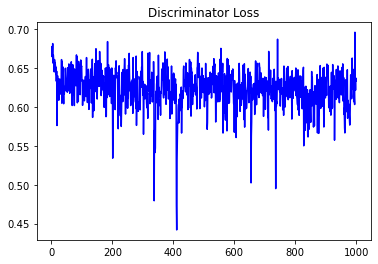

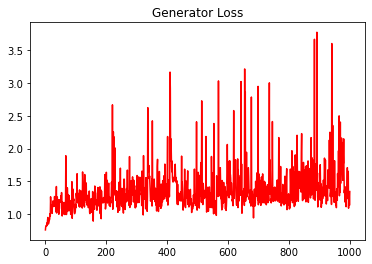

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.034206308151123584


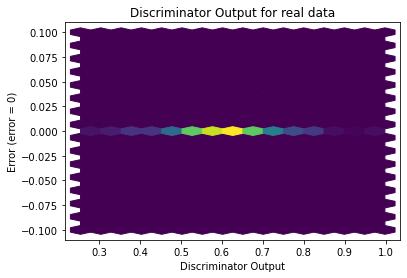

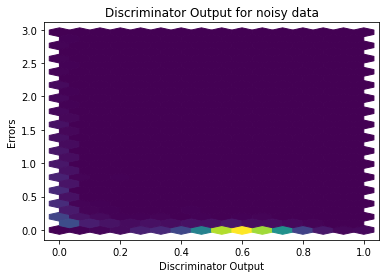

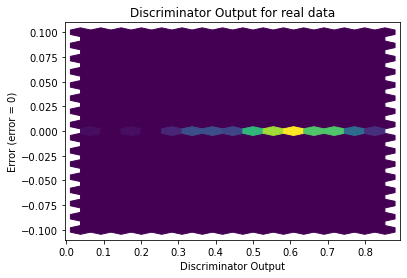

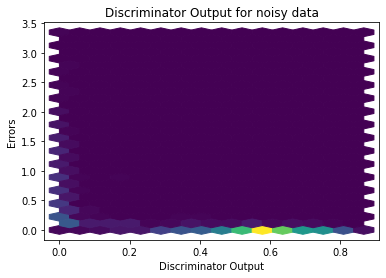

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


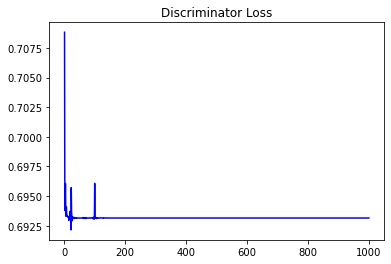

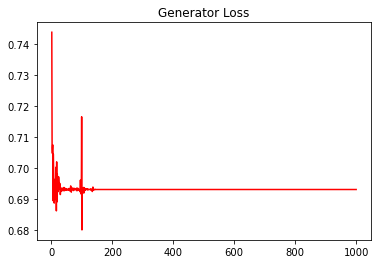

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.04000005232387936


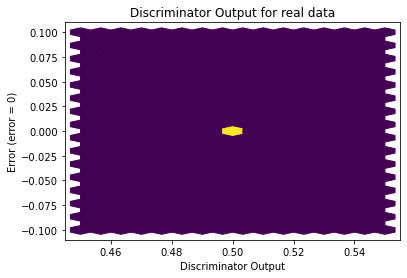

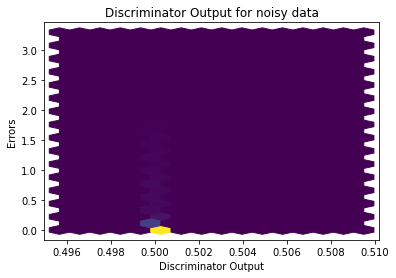

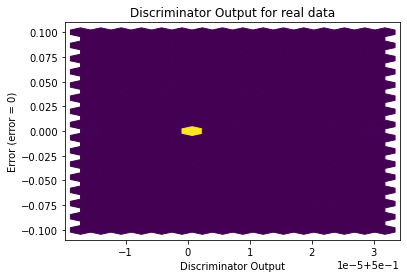

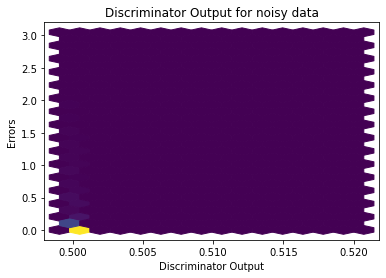

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


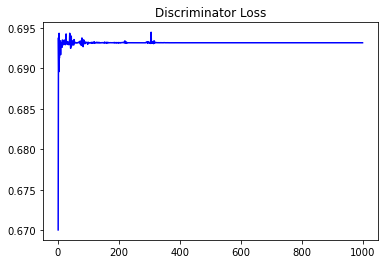

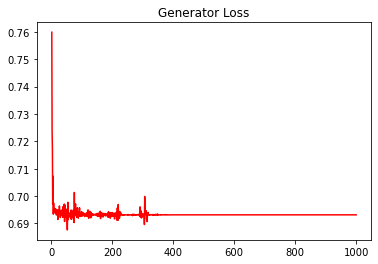

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.04359476603422459


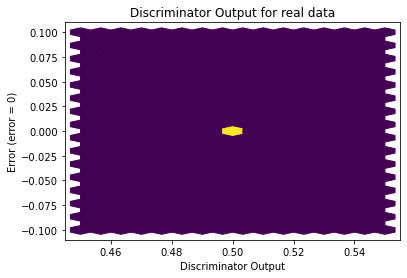

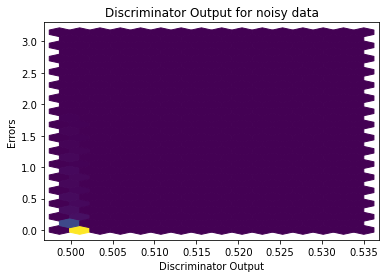

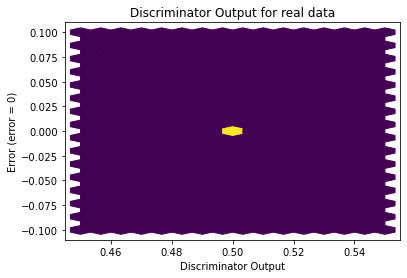

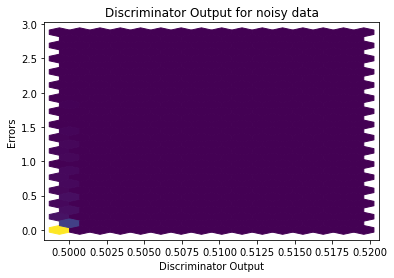

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0878]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0633]], requires_grad=True)
